Import libs

In [1]:
import numpy
import numpy as np
from numpy import * 
import pylab
import pylab as P
import scipy
from scipy import optimize
from scipy.optimize import curve_fit
from scipy import misc
from scipy import ndimage

Load racoon

In [2]:
face = misc.face(gray=True).astype(float)
face = face[:-1,200:767+200] #Use square image

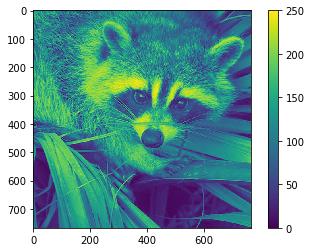

In [3]:
P.figure()
P.imshow(face)
P.colorbar()
P.show()

Define FoV etc. for FFT

In [4]:
FoV_deg = 12.0 #12.0 degrees is the required FoV for the foregrounds (~matching the 12.0407656283 deg. of the 128*128 pix EoR sim)
N = face.shape[0]
lres_deg = FoV_deg/N
lres_rad = lres_deg*(np.pi/180.)
d_Omega_lres = lres_rad**2.
d_uv_lres = 1./d_Omega_lres

FFT face

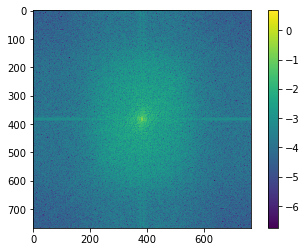

In [5]:
axes_tuple=(0,1)
fft_face=numpy.fft.ifftshift(face, axes=axes_tuple)
fft_face=numpy.fft.fftn(fft_face, axes=axes_tuple) #FFT (python pre-normalises correctly! -- see parsevals theorem for discrete fourier transform.)
fft_face=numpy.fft.fftshift(fft_face, axes=axes_tuple)
fft_face=d_Omega_lres*fft_face

P.imshow(np.log10(abs(fft_face)))
P.colorbar()
P.show()

Zero-pad the uv-plane and ifft back to the image

366 1500 767


/home/peter/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


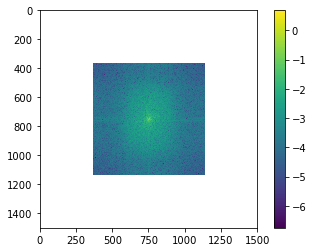

(-2.48005106392e-05+0j)
(4.77800063782+0j)


In [6]:
N_hr = 1500
hres_deg = FoV_deg/N_hr
hres_rad = hres_deg*(np.pi/180.)
d_Omega_hres = hres_rad**2.
d_uv_hres = 1./d_Omega_hres

zero_padded_fft_face = np.zeros([N_hr,N_hr])+0.0j
padding_width = (N_hr-fft_face.shape[0])/2
print padding_width, N_hr, fft_face.shape[0]
zero_padded_fft_face[padding_width+1:-padding_width,padding_width+1:-padding_width] = fft_face

P.imshow(np.log10(abs(zero_padded_fft_face)))
P.colorbar()
P.show()

wn_im_hr_test=np.random.normal(0,10,N_hr**2).reshape(N_hr,N_hr)
axes_tuple=(0,1)
fft_wn_im_hr=numpy.fft.ifftshift(wn_im_hr_test, axes=axes_tuple)
fft_wn_im_hr=numpy.fft.fftn(fft_wn_im_hr, axes=axes_tuple) #FFT (python pre-normalises correctly! -- see parsevals theorem for discrete fourier transform.)
fft_wn_im_hr=numpy.fft.fftshift(fft_wn_im_hr, axes=axes_tuple)
fft_wn_im_hr = d_Omega_hres*fft_wn_im_hr #Apply physical normalisation for FFT as per Beardsley doc.

print fft_wn_im_hr[N_hr/2,N_hr/2]
print zero_padded_fft_face[N_hr/2,N_hr/2]


3.82465080938
face.shape, face.std(): (767, 767) 55.8161918406
zero_padded_face.shape, zero_padded_face.std(): (1500, 1500) 55.8161918406
zero_padded_face.shape, zero_padded_face.real.std(): (1500, 1500) 55.8161918406


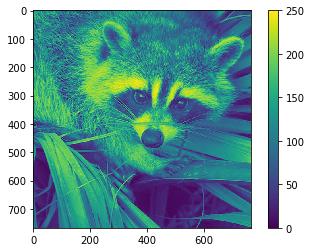

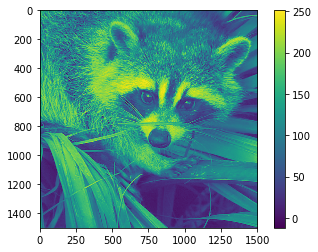

[[  93.34909266  146.29232451  152.54019077 ...,   41.29445609
    22.77904493   36.44646569]
 [ 101.33741869  142.43784405  139.14553813 ...,   51.17603681
    37.03479258   51.42575072]
 [ 104.61751866  144.2244243   140.25489867 ...,   54.07703143
    41.63112571   56.21062108]
 ..., 
 [ 101.40541794  152.6169217   164.31305416 ...,   29.3843042    24.2737023
    45.8276852 ]
 [  89.98271092  154.33419726  171.82736115 ...,   23.3031392     7.32365554
    25.28428932]
 [  87.22206294  152.09018705  168.34422231 ...,   29.26021131
     8.38913262   22.86974768]]
[[ -3.07021702e-14   1.16677864e-13   1.20780762e-13 ...,  -1.24613178e-13
   -1.88555217e-13  -1.50116129e-13]
 [ -5.26489833e-14   6.59008974e-14   4.46344994e-14 ...,  -1.79737645e-13
   -2.40652716e-13  -1.96165669e-13]
 [ -2.98486801e-14   7.83845638e-14   7.22178406e-14 ...,  -1.51530698e-13
   -2.23208592e-13  -1.61953135e-13]
 ..., 
 [  2.78466435e-14   1.58388752e-13   1.78218757e-13 ...,  -4.56304306e-14
   -8.54057

In [7]:
zero_padded_face=numpy.fft.ifftshift(zero_padded_fft_face, axes=axes_tuple)
zero_padded_face=numpy.fft.ifftn(zero_padded_face, axes=axes_tuple) #FFT (python pre-normalises correctly! -- see parsevals theorem for discrete fourier transform.)
zero_padded_face=numpy.fft.fftshift(zero_padded_face, axes=axes_tuple)
zero_padded_face=d_uv_hres*zero_padded_face

print d_uv_hres/d_uv_lres
print 'face.shape, face.std():', face.shape, face.std()
print 'zero_padded_face.shape, zero_padded_face.std():',zero_padded_face.shape, zero_padded_face.std()
print 'zero_padded_face.shape, zero_padded_face.real.std():',zero_padded_face.shape, zero_padded_face.real.std()

P.figure()
P.imshow(face)
P.colorbar()

P.figure()
P.imshow(zero_padded_face.real)
P.colorbar()
P.show()

print zero_padded_face.real
print zero_padded_face.imag

In [8]:
import sys
print sys.executable

/home/peter/anaconda2/bin/python


5.09586647274e-16


/home/peter/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10
/home/peter/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log10
/home/peter/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log10
/home/peter/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: divide by zero encountered in log10


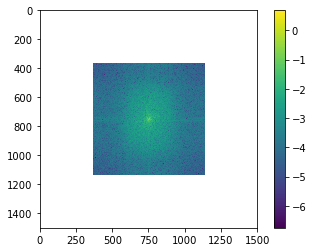

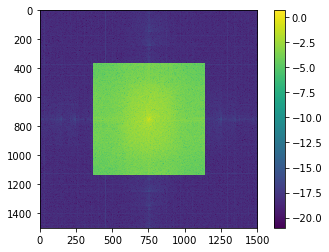

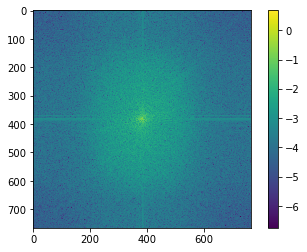

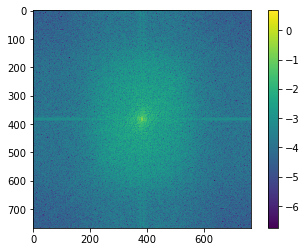

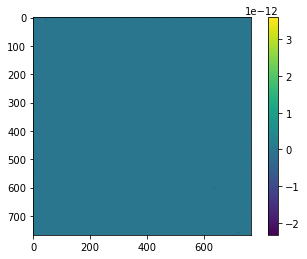

In [39]:
zero_padded_face=numpy.fft.ifftshift(zero_padded_fft_face, axes=axes_tuple)
zero_padded_face=numpy.fft.ifftn(zero_padded_face, axes=axes_tuple) #FFT (python pre-normalises correctly! -- see parsevals theorem for discrete fourier transform.)
zero_padded_face=numpy.fft.fftshift(zero_padded_face, axes=axes_tuple)
zero_padded_face=d_uv_hres*zero_padded_face

zero_padded_fft_face2=numpy.fft.ifftshift(zero_padded_face, axes=axes_tuple)
zero_padded_fft_face2=numpy.fft.fftn(zero_padded_fft_face2, axes=axes_tuple) #FFT (python pre-normalises correctly! -- see parsevals theorem for discrete fourier transform.)
zero_padded_fft_face2=numpy.fft.fftshift(zero_padded_fft_face2, axes=axes_tuple)
zero_padded_fft_face2=d_Omega_hres*zero_padded_fft_face2

print abs(zero_padded_fft_face-zero_padded_fft_face2).max()
# print zero_padded_fft_face-zero_padded_fft_face2

P.figure()
P.imshow(np.log10(abs(zero_padded_fft_face)))
P.colorbar()

P.figure()
P.imshow(np.log10(abs(zero_padded_fft_face2)))
P.colorbar()

P.figure()
P.imshow(np.log10(abs(zero_padded_fft_face2))[N_hr/2-N/2:N_hr/2+N/2,N_hr/2-N/2:N_hr/2+N/2])
P.colorbar()

P.figure()
P.imshow(np.log10(abs(fft_face)))
P.colorbar()

P.figure()
P.imshow(np.log10(abs(zero_padded_fft_face2))[N_hr/2-N/2:N_hr/2+N/2+1,N_hr/2-N/2:N_hr/2+N/2+1] - np.log10(abs(fft_face)))
P.colorbar()
P.show()